# Lagrange Points
# Chrislynn Garcia, Chris Lamb, Aaron Mueninghoff

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import astropy.units as u
import astropy.constants as const
plt.rc('axes', labelsize=14, titlesize=20)
plt.rc('figure', titlesize=20)

In [2]:
# global variable
G = 4 * np.pi**2

## Three Body Problem

The three key differential equations are 

\begin{align*}
\frac{d^2 \vec{r}_1}{d t^2} &= \frac{G M_2}{r_{1,2}^3} \vec{r}_{1,2} + \frac{G M_3}{r_{1,3}^3} \vec{r}_{1,3} &= \frac{G M_2}{r_{1,2}^3} \left( \vec{r}_2 - \vec{r}_1 \right) + \frac{G M_3}{r_{1,3}^3} \left( \vec{r}_3 - \vec{r}_1 \right) \\
\frac{d^2 \vec{r}_2}{d t^2} &= \frac{G M_1}{r_{2,1}^3} \vec{r}_{2,1} + \frac{G M_3}{r_{2,3}^3} \vec{r}_{2,3} &= \frac{G M_1}{r_{2,1}^3} \left( \vec{r}_1 - \vec{r}_2 \right) + \frac{G M_3}{r_{2,3}^3} \left( \vec{r}_3 - \vec{r}_2 \right) \\
\frac{d^2 \vec{r}_3}{d t^2} &= \frac{G M_1}{r_{3,1}^3} \vec{r}_{3,1} + \frac{G M_2}{r_{3,2}^3} \vec{r}_{3,2} &= \frac{G M_1}{r_{3,1}^3} \left( \vec{r}_1 - \vec{r}_3 \right) + \frac{G M_2}{r_{3,2}^3} \left( \vec{r}_2 - \vec{r}_3 \right)
\end{align*}

Note: vector $\vec{r}_{i,j} = \vec{r}_j - \vec{r}_i$ goes from body $i$ to body $j$.

We can separate the three key equations into a system of eighteen first-order ODEs:
\begin{align*}
& \frac{dx_1}{dt} = v_{x1} & \frac{d v_{x1}}{dt} = \frac{G M_2}{r_{1,2}^3} x_{1,2} + \frac{G M_3}{r_{1,3}^3} x_{1,3}\\
& \frac{dy_1}{dt} = v_{y1} & \frac{d v_{y1}}{dt} = \frac{G M_2}{r_{1,2}^3} y_{1,2} + \frac{G M_3}{r_{1,3}^3} y_{1,3}\\
& \frac{dz_1}{dt} = v_{z1} & \frac{d v_{z1}}{dt} = \frac{G M_2}{r_{1,2}^3} z_{1,2} + \frac{G M_3}{r_{1,3}^3} z_{1,3}\\
& \frac{dx_2}{dt} = v_{x2} & \frac{d v_{x2}}{dt} = \frac{G M_1}{r_{2,1}^3} x_{2,1} + \frac{G M_3}{r_{2,3}^3} x_{2,3}\\
& \frac{dy_2}{dt} = v_{y2} & \frac{d v_{y2}}{dt} = \frac{G M_1}{r_{2,1}^3} y_{2,1} + \frac{G M_3}{r_{2,3}^3} y_{2,3}\\
& \frac{dz_2}{dt} = v_{z2} & \frac{d v_{z2}}{dt} = \frac{G M_1}{r_{2,1}^3} z_{2,1} + \frac{G M_3}{r_{2,3}^3} z_{2,3}\\
& \frac{dx_3}{dt} = v_{x3} & \frac{d v_{x3}}{dt} = \frac{G M_1}{r_{3,1}^3} x_{3,1} + \frac{G M_2}{r_{3,2}^3} x_{3,2}\\
& \frac{dy_3}{dt} = v_{y3} & \frac{d v_{y3}}{dt} = \frac{G M_1}{r_{3,1}^3} y_{3,1} + \frac{G M_2}{r_{3,2}^3} y_{3,2}\\
& \frac{dz_3}{dt} = v_{z3} & \frac{d v_{z3}}{dt} = \frac{G M_1}{r_{3,1}^3} z_{3,1} + \frac{G M_2}{r_{3,2}^3} z_{3,2}
\end{align*}

We choose to work in astronomical units, where mass is in $\mathrm{M_\odot}$, length is in $\mathrm{AU}$, and time is in $\mathrm{yr}$. We choose these units for two reasons: (i) the value of the gravitational constant is simplified greatly in these units, $G = 4 \pi^2 \ \mathrm{AU^{3} \ M_\odot^{-1} \ yr^{-2}}$; and (ii) the input values of a system resembling the Earth-Sun system remain simple, e.g. $M_1 = 1 \ \mathrm{M_\odot}, \ a = 1 \ \mathrm{AU}$.

In [3]:
# vec = [x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z1, vx3, vy3, vz3]
def df_3body(vec, t, M1, M2, M3):
    x1 = vec[0]
    y1 = vec[1]
    z1 = vec[2]
    vx1 = vec[3]
    vy1 = vec[4]
    vz1 = vec[5]
    x2 = vec[6]
    y2 = vec[7]
    z2 = vec[8]
    vx2 = vec[9]
    vy2 = vec[10]
    vz2 = vec[11]
    x3 = vec[12]
    y3 = vec[13]
    z3 = vec[14]
    vx3 = vec[15]
    vy3 = vec[16]
    vz3 = vec[17]
    
    x12 = x2 - x1
    y12 = y2 - y1
    z12 = z2 - z1
    r12 = np.sqrt(x12**2 + y12**2 + z12**2)
    
    x21, y21, z21, r21 = (-x12, -y12, -z12, r12)
    
    x13 = x3 - x1
    y13 = y3 - y1
    z13 = z3 - z1
    r13 = np.sqrt(x13**2 + y13**2 + z13**2)
    
    x31, y31, z31, r31 = (-x13, -y13, -z13, r13)
    
    x23 = x3 - x2
    y23 = y3 - y2
    z23 = z3 - z2
    r23 = np.sqrt(x23**2 + y23**2 + z23**2)
    
    x32, y32, z32, r32 = (-x23, -y23, -z23, r23)
    
    
    dvec = np.zeros(len(vec))
     
    dvec[0 ] = vx1
    dvec[1 ] = vy1
    dvec[2 ] = vz1
    dvec[3 ] = G * M2 / r12**3 * x12 + G * M3 / r13**3 * x13
    dvec[4 ] = G * M2 / r12**3 * y12 + G * M3 / r13**3 * y13
    dvec[5 ] = G * M2 / r12**3 * z12 + G * M3 / r13**3 * z13
    dvec[6 ] = vx2
    dvec[7 ] = vy2
    dvec[8 ] = vz2
    dvec[9 ] = G * M1 / r21**3 * x21 + G * M3 / r23**3 * x23
    dvec[10] = G * M1 / r21**3 * y21 + G * M3 / r23**3 * y23
    dvec[11] = G * M1 / r21**3 * z21 + G * M3 / r23**3 * z23
    dvec[12] = vx3
    dvec[13] = vy3
    dvec[14] = vz3
    dvec[15] = G * M1 / r31**3 * x31 + G * M2 / r32**3 * x32
    dvec[16] = G * M1 / r31**3 * y31 + G * M2 / r32**3 * y32
    dvec[17] = G * M1 / r31**3 * z31 + G * M2 / r32**3 * z32
    
    return dvec

In [19]:
def calc_energy(vec, M1, M2, M3):
    x1 = vec[:,0]
    y1 = vec[:,1]
    z1 = vec[:,2]
    vx1 = vec[:,3]
    vy1 = vec[:,4]
    vz1 = vec[:,5]
    x2 = vec[:,6]
    y2 = vec[:,7]
    z2 = vec[:,8]
    vx2 = vec[:,9]
    vy2 = vec[:,10]
    vz2 = vec[:,11]
    x3 = vec[:,12]
    y3 = vec[:,13]
    z3 = vec[:,14]
    vx3 = vec[:,15]
    vy3 = vec[:,16]
    vz3 = vec[:,17]
    
    #kinteic energy
    KE1 = 0.5 * M1 * (vx1**2 + vy1**2 + vz1**2)
    KE2 = 0.5 * M2 * (vx2**2 + vy2**2 + vz2**2)
    KE3 = 0.5 * M3 * (vx3**2 + vy3**2 + vz3**2)
    KE = KE1 + KE2 + KE3
    
    #potential energy
    x12 = x2 - x1
    y12 = y2 - y1
    z12 = z2 - z1
    r12 = np.sqrt(x12**2 + y12**2 + z12**2)
    
    x21, y21, z21, r21 = (-x12, -y12, -z12, r12)
    
    x13 = x3 - x1
    y13 = y3 - y1
    z13 = z3 - z1
    r13 = np.sqrt(x13**2 + y13**2 + z13**2)
    
    x31, y31, z31, r31 = (-x13, -y13, -z13, r13)
    
    x23 = x3 - x2
    y23 = y3 - y2
    z23 = z3 - z2
    r23 = np.sqrt(x23**2 + y23**2 + z23**2)
    
    PE12 = -G * M1 * M2 / r12
    PE13 = -G * M1 * M3 / r13
    PE23 = -G * M2 * M3 / r23
    PE = PE12 + PE13 + PE23
    
    E = KE + PE
    
    return E

In [4]:
def correct_CoM(vec0, M1, M2, M3):
    marr = np.array([M1, M2, M3])
    rarr = np.array([vec0[6*i:6*i+3] for i in range(3)])
    varr = np.array([vec0[6*i+3:6*i+6] for i in range(3)])
    
    rcom = np.dot(marr, rarr) / np.sum(marr)
    vcom = np.dot(marr, varr) / np.sum(marr)
    
    rarr = rarr - rcom
    varr = varr - vcom
    
    vec0 = np.array([rarr[0], varr[0], rarr[1], varr[1], rarr[2], varr[2]]).flatten()
    return vec0


In [5]:
def plot_orbits(vec, legend=True):
    
    x1 = vec[:,0]
    y1 = vec[:,1]
    x2 = vec[:,6]
    y2 = vec[:,7]
    x3 = vec[:,12]
    y3 = vec[:,13]

    f = plt.figure(figsize=(8,8))
    plt.plot(x1, y1, label='$M_1$')
    plt.plot(x2, y2, label='$M_2$')
    plt.plot(x3, y3, label='$M_3$')
    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    plt.title('Orbits')
    plt.gca().set_aspect('equal')
    if plt.ylim()[0]>-0.5: plt.ylim(-0.5,plt.ylim()[1])
    if plt.ylim()[1]<0.5: plt.ylim(plt.ylim()[0], 0.5)
    if legend: plt.legend()
    
    f.tight_layout()
    
    return f

## Calculating orbits and Conservation Laws

### Two-body

When working with Lagrange points, we assume that the third body, the body in a lagrange point, is much less massive than the other two bodies \\ ($M_1, M_2 \gg M_3$). Therefore, we initially treat the system as a two body problem and insert the third body at the end.
First, we take in the eccentricity, the semimajor axis, and the masses of the two main bodies. From these, we must calculate the initial positions and velocities. Since the two masses are always on opposite sides of the center of mass, the origin, we take the initial positions to be on the x-axis with initial velocities along the y-axis such that the orbits are counterclockwise. Without loss of generality, we assume that $M_1$ start on the positive x-axis and $M_2$ starts on the negative x-axis.
For a given semimajor axis and an eccentricity, the radius $r$ as a function of the semimajor axis and the angle $\phi$, measured from the x-axis, is given by $$r = \frac{a(1-e^2)}{1 + e \cos \phi} \mathrm{.}$$ We are assuming that $\phi=0$ initially, though, and so we use $$r = \frac{a(1-e^2)}{1 + e} = a(1-e) \mathrm{.}$$
The radius of each mass is then given by $$r_1 = \frac{M_2}{M} r \qquad r_2 = \frac{M_1}{M} r$$ where $M = M_1 + M_2$.
In the astronomical units we have chosen, the period $P$ and the semimajor axis $a$ are related by $$P^2 = \frac{1}{M} a^3 \mathrm{.}$$
We use the conservation of angular momentum to calculate the initial velocity.
$$\ell = |\vec{r} \times \vec{v}| = \left[ G M a (1 - e^2) \right]^{1/2}$$
Since the radius and velocity are perpendicular at the pericenter and apocenter, and we assume that the masses start at the pericenter on the x-axis, we have that $\vec{r} = r \hat{x}$ and $\vec{v} = v \hat{y}$.
$$|\vec{r} \times \vec{v}| = |(r \hat{x}) \times (v \hat{y})| = rv \quad \implies \quad v = \frac{\sqrt{G M a (1 - e^2)}}{r}$$
As with the radii, we then find the velocity for each mass.
$$ v_1 = \frac{M_2}{M} v \qquad v_2 = \frac{M_1}{M} v$$

### Adding the third body

Now that we have a a stable two body orbit, we simply place the much less massive third body at a lagrange point, with the correct initial velocity.

Once we have the three bodies set up, we make a small correction to the initial positions and velocities of all three bodies so that we remain in the center of mass frame. We do this by calculating the center of mass and the center of mass's velocity, then subtracting off these values from the initial positions and velocities.
$$ M = \sum_{i=1}^3 M_i, \qquad \vec{R}_{\mathrm{CoM}} = \frac{1}{M} \sum_{i=1}^3 M_i \vec{r}_i, \qquad \vec{V}_{\mathrm{CoM}} = \frac{1}{M} \sum_{i=1}^3 M_i \vec{v}_i$$

$$\vec{r}_{i,\mathrm{new}} = \vec{r}_{i,\mathrm{old}} - \vec{R}_{\mathrm{CoM}}, \qquad \vec{v}_{i,\mathrm{new}} = \vec{v}_{i,\mathrm{old}} - \vec{V}_{\mathrm{CoM}}$$

## $L_1$, $L_2$, $L_3$, and $L_4$

In [6]:
r = 1
M1 = 1
M2 = 1e-3
M3 = 1e-10

# initial_2body
M = M1 + M2
r1 = M2 / M * r
r2 = M1 / M * r
P = np.sqrt(r**3 / M)
v = np.sqrt(G * M / r)
v1 = M2 / M * v
v2 = M1 / M * v

# initial values for two bodies
vec0 = np.zeros(18)
vec0[0] = -r1
vec0[4] = -v1
vec0[6] = r2
vec0[10] = v2

In [7]:
# L_1 initial values


vec1 = np.array([x3,y3,0,vx3,vy3,0])

In [8]:
# L_2 initial values


vec2 = np.array([x3,y3,0,vx3,vy3,0])

In [9]:
# L_3 initial values


vec3 = np.array([x3,y3,0,vx3,vy3,0])

In [10]:
# L_4 initial values
r3 = r2
v3 = v2

x3 = r3 * np.cos(np.pi/3)
y3 = r3 * np.sin(np.pi/3)
vx3 = -v3 * np.sin(np.pi/3)
vy3 = v3 * np.cos(np.pi/3)

vec4 = np.array([x3,y3,0,vx3,vy3,0])

In [11]:
veclist = []
for vecn in (vec1, vec2, vec3, vec4):
    vec0[12:] = vecn
    vec0 = correct_CoM(vec0, M1, M2, M3)
    
    tarr = np.linspace(0, P, 10000)
    vec = integrate.odeint(df_3body, vec0, tarr, args=(M1, M2, M3))
    
    veclist.append(vec)

### Plotting

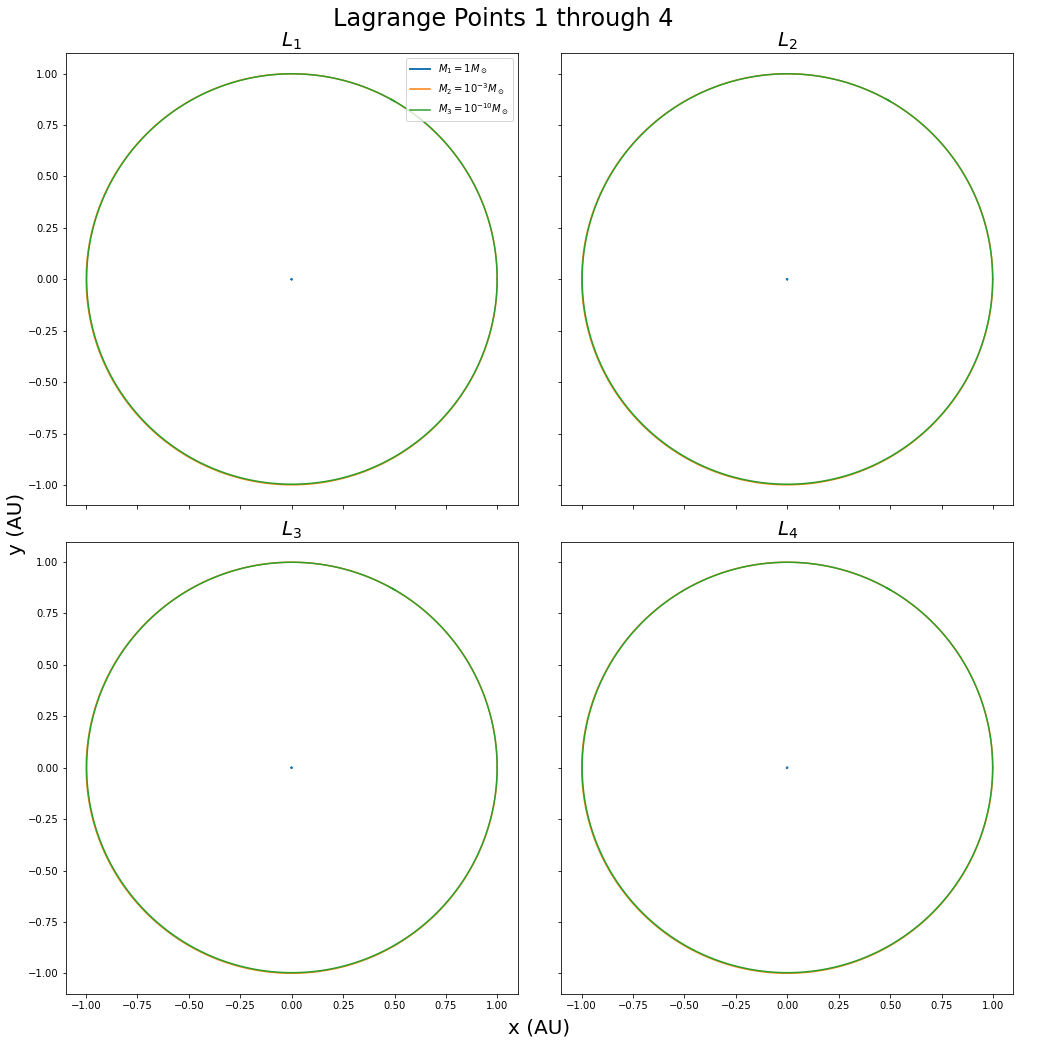

In [22]:
fig, axs = plt.subplots(2,2, figsize=(15,15), sharex=True, sharey=True)

for i, (ax,vec) in enumerate(zip(axs.flatten(), veclist),1):
    x1 = vec[:,0]
    y1 = vec[:,1]
    x2 = vec[:,6]
    y2 = vec[:,7]
    x3 = vec[:,12]
    y3 = vec[:,13]
    
    ax.plot(x1, y1, label='$M_1 = 1 M_\odot$', alpha=1, lw=2)
    ax.plot(x2, y2, label='$M_2 = 10^{-3} M_\odot$')
    ax.plot(x3, y3, label='$M_3 = 10^{-10} M_\odot$')
    ax.set_aspect('equal')
    ax.set_title('$L_{{{:.0f}}}$'.format(i), fontsize=20)
    
    
fig.add_subplot(111, frameon=False, xticks=(), yticks=())
plt.xlabel('x (AU)', fontsize=20, labelpad=25)
plt.ylabel('y (AU)', fontsize=20, labelpad=20)

handles, labels = ax.get_legend_handles_labels()
axs[0,0].legend(handles, labels, loc='upper right')

fig.suptitle('Lagrange Points 1 through 4', fontsize=24)

fig.tight_layout(rect=(0,0,1,1))

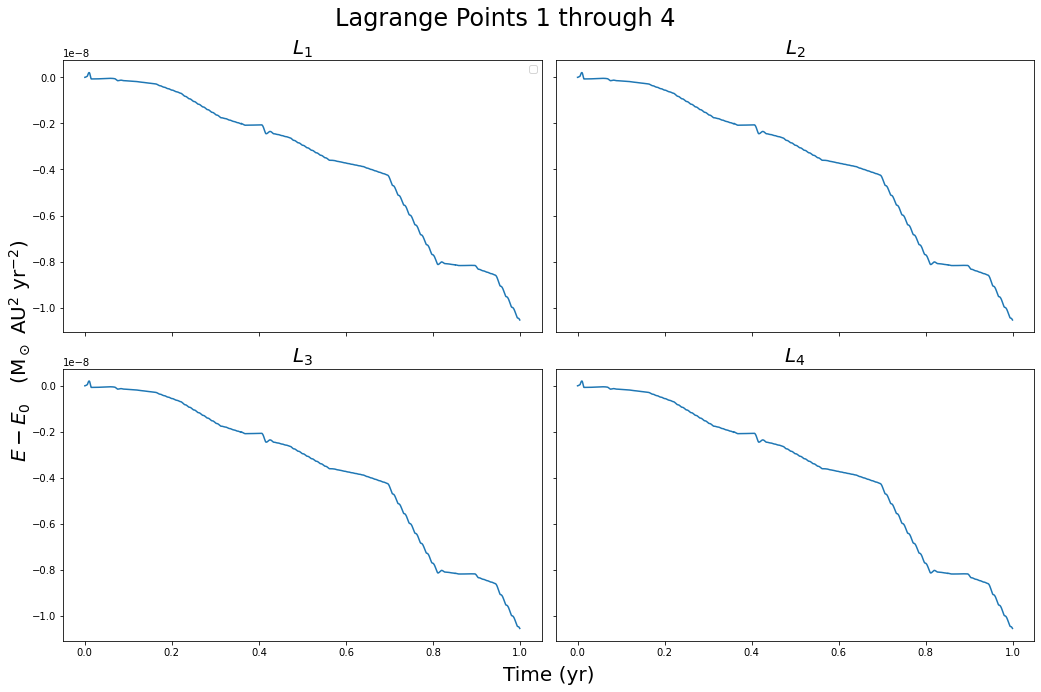

In [21]:
fig, axs = plt.subplots(2,2, figsize=(15,10), sharex=True, sharey=True)

for i, (ax,vec) in enumerate(zip(axs.flatten(),veclist),1):
    E = calc_energy(vec, M1, M2, M3)
    dE = E - E[0]
    ax.plot(tarr, dE)
    ax.set_title('$L_{{{:.0f}}}$'.format(i), fontsize=20)
    
fig.add_subplot(111, frameon=False, xticks=(), yticks=())
plt.xlabel('Time (yr)', fontsize=20, labelpad=25)
plt.ylabel('$E - E_0 \quad (\mathrm{M_\odot \ AU^2 \ yr^{-2}})$', fontsize=20, labelpad=30)

handles, labels = ax.get_legend_handles_labels()
axs[0,0].legend(handles, labels, loc='upper right')

fig.suptitle('Lagrange Points 1 through 4', fontsize=24)

fig.tight_layout(rect=(0,0,1,1)) 